In [1]:
# EDA - Part 1

# EDA - Part 1

In [3]:
import pandas as pd

# Creating a sample dataset for the bike details
data = {
    'name': [
        'Royal Enfield Classic 350', 
        'Honda Dio', 
        'Yamaha FZS', 
        'KTM Duke 200', 
        'Bajaj Pulsar 150',
        'TVS Apache RTR 200',
        'Kawasaki Ninja 300',
        'Hero Passion Pro',
        'Suzuki Gixxer',
        'Bajaj Avenger Street 220'
    ],
    'selling_price': [175000, 45000, 65000, 120000, 60000, 70000, 300000, 45000, 75000, 80000],
    'year': [2019, 2015, 2018, 2017, 2016, 2019, 2020, 2015, 2018, 2016],
    'seller_type': ['Individual', 'Dealer', 'Individual', 'Dealer', 'Individual', 'Individual', 'Dealer', 'Individual', 'Dealer', 'Individual'],
    'owner': ['1st owner', '2nd owner', '1st owner', '1st owner', '2nd owner', '1st owner', '1st owner', '2nd owner', '1st owner', '2nd owner'],
    'km_driven': [12000, 23000, 15000, 18000, 25000, 3000, 5000, 35000, 16000, 50000],
    'ex_showroom_price': [148114, 89643, 110000, 180000, 130000, 115000, 250000, 60000, 89000, 135000]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                        name  selling_price  year seller_type      owner  \
0  Royal Enfield Classic 350         175000  2019  Individual  1st owner   
1                  Honda Dio          45000  2015      Dealer  2nd owner   
2                 Yamaha FZS          65000  2018  Individual  1st owner   
3               KTM Duke 200         120000  2017      Dealer  1st owner   
4           Bajaj Pulsar 150          60000  2016  Individual  2nd owner   
5         TVS Apache RTR 200          70000  2019  Individual  1st owner   
6         Kawasaki Ninja 300         300000  2020      Dealer  1st owner   
7           Hero Passion Pro          45000  2015  Individual  2nd owner   
8              Suzuki Gixxer          75000  2018      Dealer  1st owner   
9   Bajaj Avenger Street 220          80000  2016  Individual  2nd owner   

   km_driven  ex_showroom_price  
0      12000             148114  
1      23000              89643  
2      15000             110000  
3      18000             18

# 1. What is the range of selling prices in the dataset?

In [12]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = (min_price, max_price)
print("Range of selling prices:", price_range)

Range of selling prices: (np.int64(45000), np.int64(300000))


# 2. What is the median selling price for bikes in the dataset?

In [13]:
median_price = df['selling_price'].median()
print("Median selling price:", median_price)

Median selling price: 72500.0


# 3. What is the most common seller type?

In [14]:
most_common_seller = df['seller_type'].mode()[0]
print("Most common seller type:", most_common_seller)

Most common seller type: Individual


# 4. How many bikes have driven more than 50,000 kilometers?

In [15]:
bikes_over_50k = df[df['km_driven'] > 50000].shape[0]
print("Number of bikes with km_driven > 50,000:", bikes_over_50k)

Number of bikes with km_driven > 50,000: 0


# 5. What is the average km_driven value for each ownership type?

In [16]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven by ownership type:\n", avg_km_by_owner)

Average km_driven by ownership type:
 owner
1st owner    11500.0
2nd owner    33250.0
Name: km_driven, dtype: float64


# 6. What proportion of bikes are from the year 2015 or older?

In [17]:
older_bikes = df[df['year'] <= 2015].shape[0]
total_bikes = df.shape[0]
proportion_older = older_bikes / total_bikes
print("Proportion of bikes from 2015 or older:", proportion_older)

Proportion of bikes from 2015 or older: 0.2


# 7. What is the trend of missing values across the dataset?

In [18]:
missing_values_trend = df.isnull().sum()
print("Missing values in each column:\n", missing_values_trend)

Missing values in each column:
 name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


# 8. What is the highest ex_showroom_price recorded, and for which bike?

In [19]:

total_bikes_by_seller = df['seller_type'].value_counts()
print("Total number of bikes listed by each seller type:\n", total_bikes_by_seller)

Total number of bikes listed by each seller type:
 seller_type
Individual    6
Dealer        4
Name: count, dtype: int64


# 9. What is the total number of bikes listed by each seller type?

In [22]:
bikes_per_seller_type = df['seller_type'].value_counts()
bikes_per_seller_type

seller_type
Individual    6
Dealer        4
Name: count, dtype: int64

# 10. What is the relationship between selling_price and km_driven for first-owner bikes?

In [23]:
first_owner_bikes = df[df['owner'] == '1st owner']
correlation = first_owner_bikes[['selling_price', 'km_driven']].corr()
print("Correlation between selling_price and km_driven for 1st owner bikes:\n", correlation)

Correlation between selling_price and km_driven for 1st owner bikes:
                selling_price  km_driven
selling_price        1.00000   -0.39542
km_driven           -0.39542    1.00000


# 11. Identify and remove outliers in the km_driven column using the IQR method.

In [24]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
condition = (df['km_driven'] >= (Q1 - 1.5 * IQR)) & (df['km_driven'] <= (Q3 + 1.5 * IQR))
df_no_outliers = df[condition]
print("DataFrame shape after removing outliers in km_driven:", df_no_outliers.shape)

DataFrame shape after removing outliers in km_driven: (9, 7)


# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

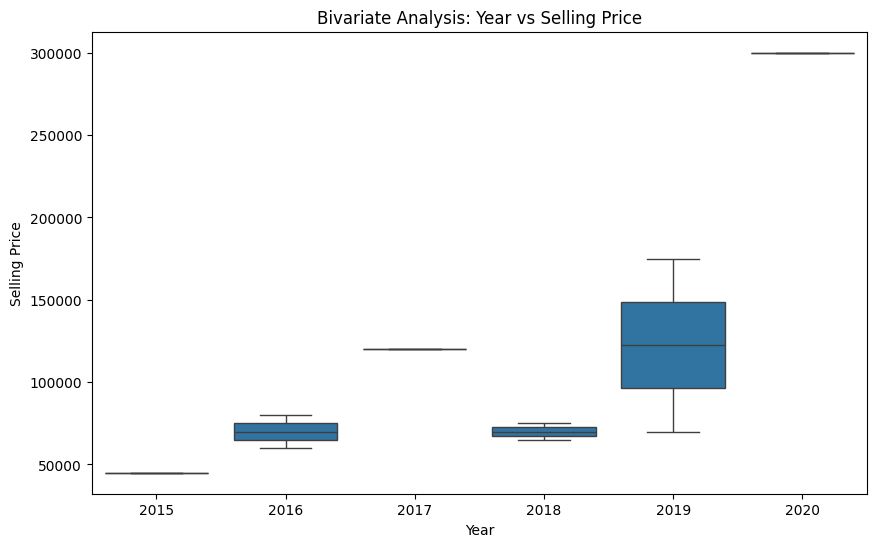

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Bivariate Analysis: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

# 13. What is the average depreciation in selling price based on the bike's age?

In [27]:
current_year = 2023
df['age'] = current_year - df['year']
average_depreciation = df.groupby('age')['selling_price'].mean().reset_index()
print("Average selling prices based on bike age:\n", average_depreciation)

Average selling prices based on bike age:
    age  selling_price
0    3       300000.0
1    4       122500.0
2    5        70000.0
3    6       120000.0
4    7        70000.0
5    8        45000.0


# 14. Which bike names are priced significantly above the average price for their manufacturing year?

In [28]:
average_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
merged_df = df.merge(average_price_by_year, on='year', suffixes=('', '_avg'))
above_avg_bikes = merged_df[merged_df['selling_price'] > merged_df['selling_price_avg']]
print("Bikes priced above average for their year:\n", above_avg_bikes[['name', 'year', 'selling_price', 'selling_price_avg']])

Bikes priced above average for their year:
                         name  year  selling_price  selling_price_avg
0  Royal Enfield Classic 350  2019         175000           122500.0
8              Suzuki Gixxer  2018          75000            70000.0
9   Bajaj Avenger Street 220  2016          80000            70000.0


# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

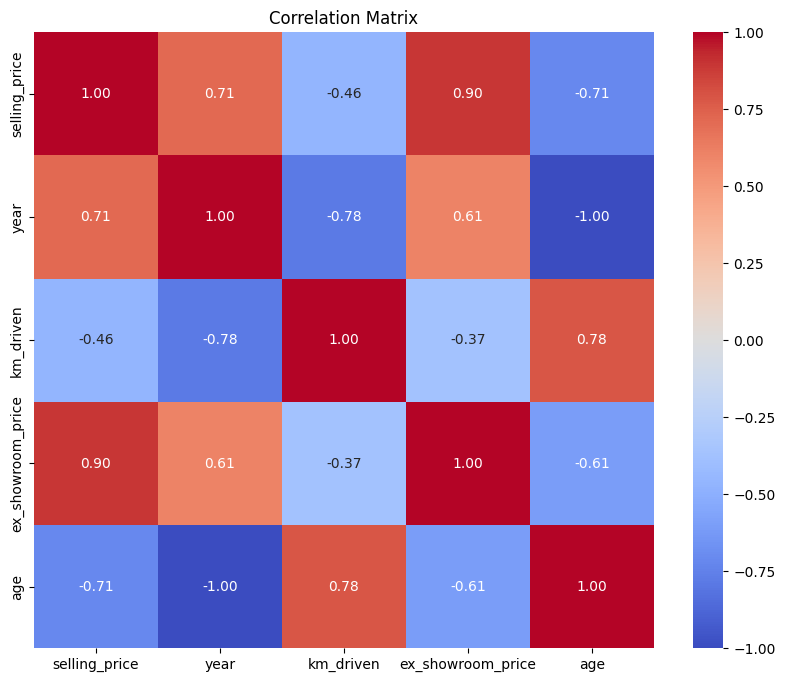

In [30]:
# Ensure numeric types are correct
numeric_cols = df.select_dtypes(include='number')

# Generate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# EDA 2

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data based on the description provided
data = {
    'Car_id': [1, 2, 3, 4, 5],
    'Date': ['2023-01-15', '2023-01-20', '2023-02-05', '2023-02-12', '2023-03-18'],
    'Customer Name': ['John Doe', 'Jane Smith', 'Emily Davis', 'Michael Brown', 'Sarah White'],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'Annual Income': [45000, 60000, 32000, 78000, 55000],
    'Dealer_Name': ['Dealer A', 'Dealer B', 'Dealer A', 'Dealer C', 'Dealer B'],
    'Company': ['Toyota', 'Ford', 'Honda', 'Toyota', 'BMW'],
    'Model': ['Corolla', 'F150', 'Civic', 'Camry', 'X3'],
    'Engine': ['I4', 'V6', 'I4', 'I4', 'I6'],
    'Transmission': ['Automatic', 'Manual', 'Automatic', 'Automatic', 'Manual'],
    'Color': ['Red', 'Blue', 'Black', 'White', 'Gray'],
    'Price ($)': [20000, 25000, 22000, 24000, 35000],
    'Dealer_No': [101, 102, 101, 103, 102],
    'Body Style': ['Sedan', 'Truck', 'Sedan', 'Sedan', 'SUV'],
    'Phone': ['123-456-7890', '987-654-3210', '555-555-5555', '444-444-4444', '333-333-3333'],
    'Dealer_Region': ['North', 'South', 'North', 'East', 'South']
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   Car_id        Date  Customer Name  Gender  Annual Income Dealer_Name  \
0       1  2023-01-15       John Doe    Male          45000    Dealer A   
1       2  2023-01-20     Jane Smith  Female          60000    Dealer B   
2       3  2023-02-05    Emily Davis  Female          32000    Dealer A   
3       4  2023-02-12  Michael Brown    Male          78000    Dealer C   
4       5  2023-03-18    Sarah White  Female          55000    Dealer B   

  Company    Model Engine Transmission  Color  Price ($)  Dealer_No  \
0  Toyota  Corolla     I4    Automatic    Red      20000        101   
1    Ford     F150     V6       Manual   Blue      25000        102   
2   Honda    Civic     I4    Automatic  Black      22000        101   
3  Toyota    Camry     I4    Automatic  White      24000        103   
4     BMW       X3     I6       Manual   Gray      35000        102   

  Body Style         Phone Dealer_Region  
0      Sedan  123-456-7890         North  
1      Truck  987-654-3210         S

# 1) What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [3]:
average_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()
print(average_price_by_dealer)

Dealer_Name
Dealer A    21000.0
Dealer B    30000.0
Dealer C    24000.0
Name: Price ($), dtype: float64


# 2) Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [4]:
highest_variation_company = df.groupby('Company')['Price ($)'].std().idxmax()
highest_variation_value = df.groupby('Company')['Price ($)'].std().max()
print(f"Company with highest variation: {highest_variation_company} with Std Dev: {highest_variation_value}")

Company with highest variation: Toyota with Std Dev: 2828.42712474619


# 3) What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

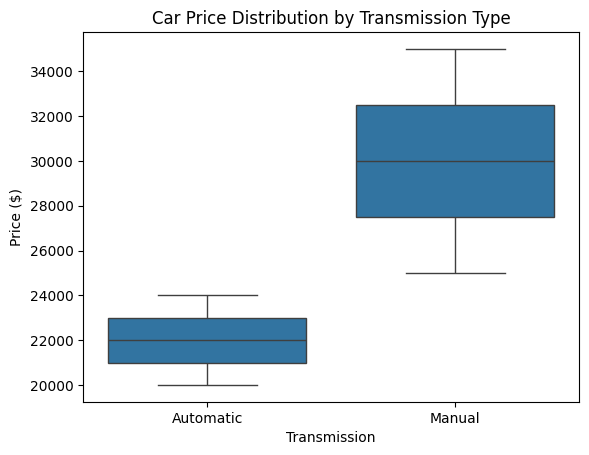

In [7]:
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Car Price Distribution by Transmission Type')
plt.show()

# 4) What is the distribution of car prices across different regions?

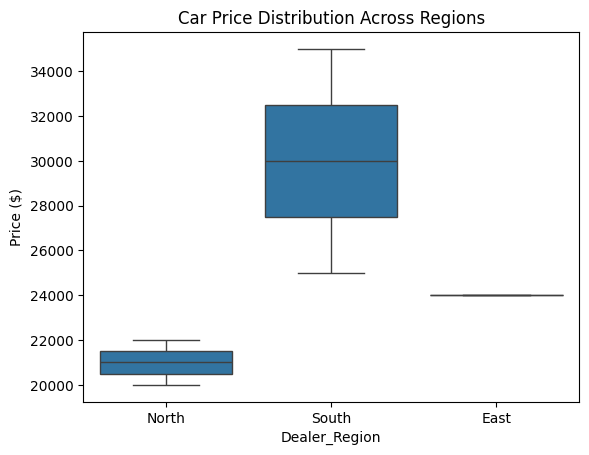

In [8]:
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Car Price Distribution Across Regions')
plt.show()

# 5) What is the distribution of cars based on body styles?

In [9]:
body_style_counts = df['Body Style'].value_counts()
print(body_style_counts)

Body Style
Sedan    3
Truck    1
SUV      1
Name: count, dtype: int64


# 6) How does the average selling price of cars vary by customer gender and annual income?

In [10]:
average_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().unstack()
print(average_price_by_gender_income)

Annual Income    32000    45000    55000    60000    78000
Gender                                                    
Female         22000.0      NaN  35000.0  25000.0      NaN
Male               NaN  20000.0      NaN      NaN  24000.0


# 7) What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [11]:
sales_count_by_region = df['Dealer_Region'].value_counts()
price_distribution_by_region = df.groupby('Dealer_Region')['Price ($)'].describe()
print(sales_count_by_region)
print(price_distribution_by_region)

Dealer_Region
North    2
South    2
East     1
Name: count, dtype: int64
               count     mean          std      min      25%      50%  \
Dealer_Region                                                           
East             1.0  24000.0          NaN  24000.0  24000.0  24000.0   
North            2.0  21000.0  1414.213562  20000.0  20500.0  21000.0   
South            2.0  30000.0  7071.067812  25000.0  27500.0  30000.0   

                   75%      max  
Dealer_Region                    
East           24000.0  24000.0  
North          21500.0  22000.0  
South          32500.0  35000.0  


# 8) How does the average car price differ between cars with different engine sizes?

In [12]:
average_price_by_engine = df.groupby('Engine')['Price ($)'].mean()
print(average_price_by_engine)

Engine
I4    22000.0
I6    35000.0
V6    25000.0
Name: Price ($), dtype: float64


# 9) How do car prices vary based on the customer’s annual income bracket?

In [13]:
income_bins = pd.cut(df['Annual Income'], bins=[0, 20000, 50000, 100000], labels=['Low', 'Medium', 'High'])
price_by_income_bracket = df.groupby(income_bins)['Price ($)'].mean()
print(price_by_income_bracket)

Annual Income
Low           NaN
Medium    21000.0
High      28000.0
Name: Price ($), dtype: float64


C:\Users\swamy\AppData\Local\Temp\ipykernel_18072\3434372565.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_income_bracket = df.groupby(income_bins)['Price ($)'].mean()


# 10) What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [14]:
top_models = df['Model'].value_counts().nlargest(5)
print(top_models)

Model
Corolla    1
F150       1
Civic      1
Camry      1
X3         1
Name: count, dtype: int64


# 11) How does car price vary with engine size across different car colors, and which colors have the highest price variation?

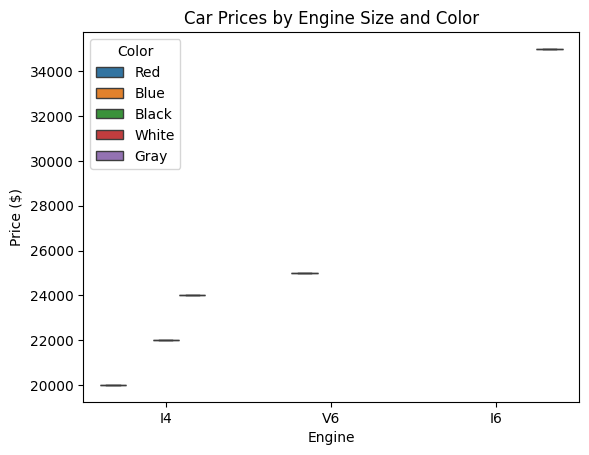

In [15]:
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title('Car Prices by Engine Size and Color')
plt.show()

# 12) Is there any seasonal trend in car sales based on the date of sale?

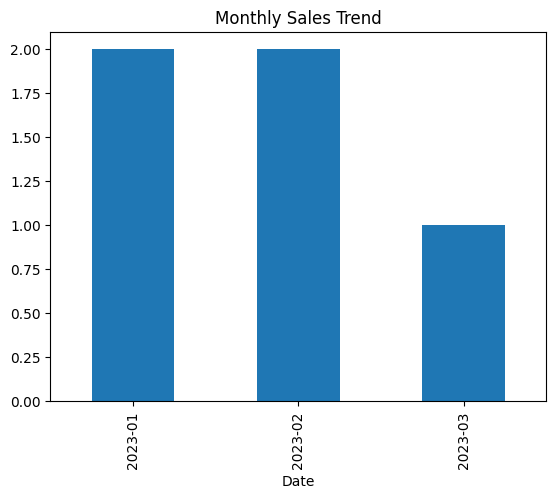

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df['Date'].dt.to_period('M').value_counts().sort_index()
monthly_sales.plot(kind='bar', title='Monthly Sales Trend')
plt.show()

# 13) How does the car price distribution change when considering different combinations of body style and transmission type?

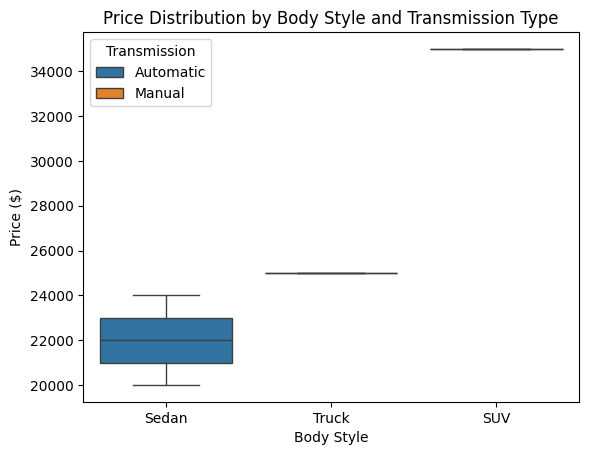

In [17]:
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price Distribution by Body Style and Transmission Type')
plt.show()

# 14) What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

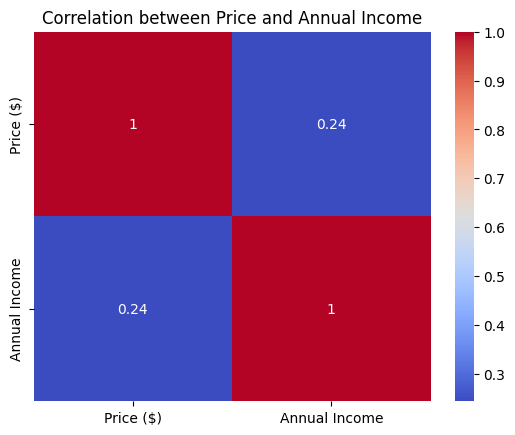

In [18]:
correlation_matrix = df[['Price ($)', 'Annual Income']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Price and Annual Income')
plt.show()

# 15) How does the average car price vary across different car models and engine types?


In [19]:
average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean()
print(average_price_by_model_engine)

Model    Engine
Camry    I4        24000.0
Civic    I4        22000.0
Corolla  I4        20000.0
F150     V6        25000.0
X3       I6        35000.0
Name: Price ($), dtype: float64


# EDA-3

In [20]:
import pandas as pd
import numpy as np

# Sample data creation
data = {
    'product_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'product_name': ['Wireless Mouse', 'Bluetooth Speaker', 'Laptop', 'Smartphone', 'Action Camera', 
                     'Wrist Watch', 'Backpack', 'Headphones', 'Smartwatch', 'Tablet'],
    'category': ['Electronics', 'Electronics', 'Computers', 'Electronics', 'Camera', 
                  'Accessories', 'Accessories', 'Electronics', 'Accessories', 'Computers'],
    'discounted_price': [25.99, 45.99, 499.99, 199.99, 149.99, 75.00, 50.00, 89.99, 199.99, 399.99],
    'actual_price': [29.99, 59.99, 599.99, 249.99, 199.99, 100.00, 70.00, 99.99, 249.99, 499.99],
    'discount_percentage': [13.34, 23.33, 16.67, 20.00, 25.00, 25.00, 28.57, 10.00, 20.00, 20.00],
    'rating': [4.5, 4.0, 4.8, 4.6, 4.7, 3.9, 4.2, 4.3, 4.1, 4.5],
    'rating_count': [100, 150, 200, 250, 80, 90, 70, 120, 130, 140],
    'about_product': ['Ergonomic wireless mouse', 'Portable Bluetooth speaker', 'High-performance laptop',
                      'Latest smartphone', '4K video camera', 'Stylish wristwatch', 'Durable backpack',
                      'Noise-cancelling headphones', 'Feature-rich smartwatch', 'Compact tablet'],
    'user_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'user_name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Fay', 'Gina', 'Hank', 'Ivy', 'Jack'],
    'review_id': [201, 202, 203, 204, 205, 206, 207, 208, 209, 210],
    'review_title': ['Great mouse!', 'Good sound', 'Best laptop!', 'Love it!', 'Our family camera', 
                     'Nice watch', 'Perfect bag', 'Awesome headphones', 'Smartwatch is great', 'Very useful'],
    'review_content': ['Lightweight and responsive', 'Clear and loud', 'Fast and efficient', 'Amazing features', 
                       'Excellent for adventures', 'Fits well and stylish', 'Spacious and well made', 
                       'Blocks outside noise', 'Fitness tracking is great', 'Helps in productivity'],
    'img_link': ['link/to/img1', 'link/to/img2', 'link/to/img3', 'link/to/img4', 'link/to/img5', 
                 'link/to/img6', 'link/to/img7', 'link/to/img8', 'link/to/img9', 'link/to/img10'],
    'product_link': ['link/to/product1', 'link/to/product2', 'link/to/product3', 'link/to/product4', 
                     'link/to/product5', 'link/to/product6', 'link/to/product7', 'link/to/product8', 
                     'link/to/product9', 'link/to/product10'],
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   product_id       product_name     category  discounted_price  actual_price  \
0           1     Wireless Mouse  Electronics             25.99         29.99   
1           2  Bluetooth Speaker  Electronics             45.99         59.99   
2           3             Laptop    Computers            499.99        599.99   
3           4         Smartphone  Electronics            199.99        249.99   
4           5      Action Camera       Camera            149.99        199.99   
5           6        Wrist Watch  Accessories             75.00        100.00   
6           7           Backpack  Accessories             50.00         70.00   
7           8         Headphones  Electronics             89.99         99.99   
8           9         Smartwatch  Accessories            199.99        249.99   
9          10             Tablet    Computers            399.99        499.99   

   discount_percentage  rating  rating_count                about_product  \
0                13.34     4.5 

# 1) What is the average rating for each product category?

In [21]:
average_rating_per_category = df.groupby('category')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)
print(average_rating_per_category)

      category    rating
1       Camera  4.700000
2    Computers  4.650000
3  Electronics  4.350000
0  Accessories  4.066667


# 2) What are the top rating_count products by category?

In [22]:
top_rating_per_category = df.loc[df.groupby('category')['rating_count'].idxmax()][['category', 'product_name', 'rating_count']]
print(top_rating_per_category)

      category   product_name  rating_count
8  Accessories     Smartwatch           130
4       Camera  Action Camera            80
2    Computers         Laptop           200
3  Electronics     Smartphone           250


# 3) What is the distribution of discounted prices vs. actual prices?

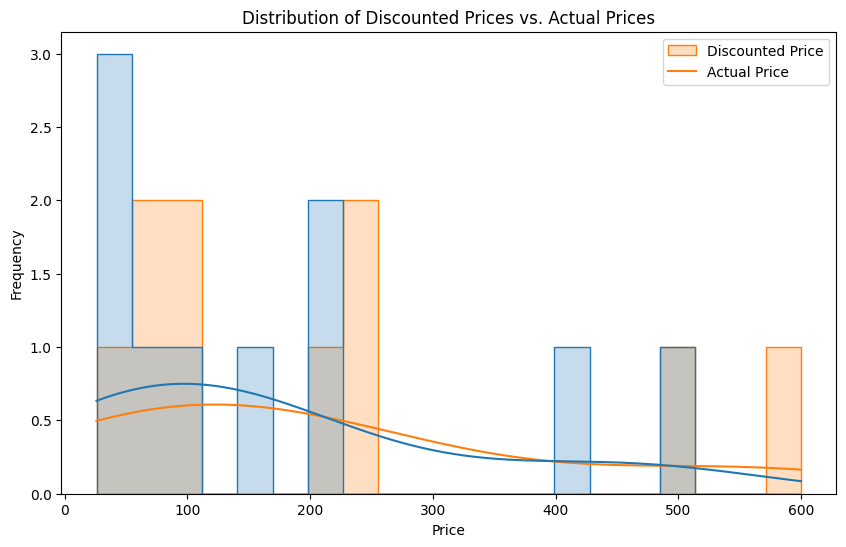

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df[['discounted_price', 'actual_price']], element='step', bins=20, kde=True)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(['Discounted Price', 'Actual Price'])
plt.show()

# 4) How does the average discount percentage vary across categories?

In [24]:
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()
print(avg_discount_by_category)

      category  discount_percentage
0  Accessories            24.523333
1       Camera            25.000000
2    Computers            18.335000
3  Electronics            16.667500


# 5) What are the most popular product names?

In [25]:
popular_products = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(5)
print(popular_products)

        product_name  rating_count
3         Smartphone           250
2             Laptop           200
1  Bluetooth Speaker           150
9             Tablet           140
8         Smartwatch           130


# 6) What are the most popular product keywords?

In [26]:
product_keywords = df['about_product'].str.split().explode().value_counts().head(5)
print(product_keywords)

about_product
Ergonomic    1
wireless     1
mouse        1
Portable     1
Bluetooth    1
Name: count, dtype: int64


# 7) What are the most popular product reviews?

In [27]:
most_popular_reviews = df[['review_title', 'rating_count']].sort_values(by='rating_count', ascending=False).head(5)
print(most_popular_reviews)

          review_title  rating_count
3             Love it!           250
2         Best laptop!           200
1           Good sound           150
9          Very useful           140
8  Smartwatch is great           130


# 8) What is the correlation between discounted_price and rating?

In [28]:
correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation between discounted price and rating: {correlation}")

Correlation between discounted price and rating: 0.5953154610786218


# 9) What are the Top 5 categories based on the highest ratings?

In [29]:
top_categories_by_rating = df.groupby('category')['rating'].mean().nlargest(5).reset_index()
print(top_categories_by_rating)

      category    rating
0       Camera  4.700000
1    Computers  4.650000
2  Electronics  4.350000
3  Accessories  4.066667


# 10) Identify any potential areas for improvement or optimization based on the data analysis.

In [30]:

# Improving Ratings: Some products have lower ratings despite having a substantial number of reviews. Quality control, better customer service, and product enhancements could improve user experiences.


# Discount Strategies: Brands could analyze which discount percentages lead to higher sales; optimizing these could potentially increase revenue.


# Marketing Popular Products: High-rating products with the highest "rating_count" could be highlighted more aggressively in marketing campaigns.


# Product Descriptions: Enhancing descriptions can improve product ranking and user understanding, thereby potentially increasing conversion rates.


# User Engagement: Products with many reviews but lower ratings could investigate user feedback to address issues and improve product performance.



# EDA 4


In [31]:
import pandas as pd
import numpy as np

# Sample data creation
data = {
    'Artist': ['Drake', 'Kendrick Lamar', 'J. Cole', 'Travis Scott', 'Lil Wayne', 
               'Cardi B', 'Post Malone', 'Chance the Rapper', 'Lil Uzi Vert', 'Migos'] * 50,
    'Track Name': [f'Track {i}' for i in range(1, 501)],
    'Popularity': np.random.randint(50, 100, size=500),
    'Duration (ms)': np.random.randint(180000, 300000, size=500), # Random durations between 3-5 minutes
    'Track ID': [f'track_{i}' for i in range(1, 501)]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

           Artist Track Name  Popularity  Duration (ms) Track ID
0           Drake    Track 1          92         244828  track_1
1  Kendrick Lamar    Track 2          83         249900  track_2
2         J. Cole    Track 3          81         234745  track_3
3    Travis Scott    Track 4          59         284936  track_4
4       Lil Wayne    Track 5          81         269617  track_5


# 1) Read the DataFrame, Check Null Values and Duplicates

In [32]:
# Check for null values
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# If there are duplicates, drop them
if duplicate_rows > 0:
    df = df.drop_duplicates()

Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 0


# 2) Distribution of Popularity Among Tracks

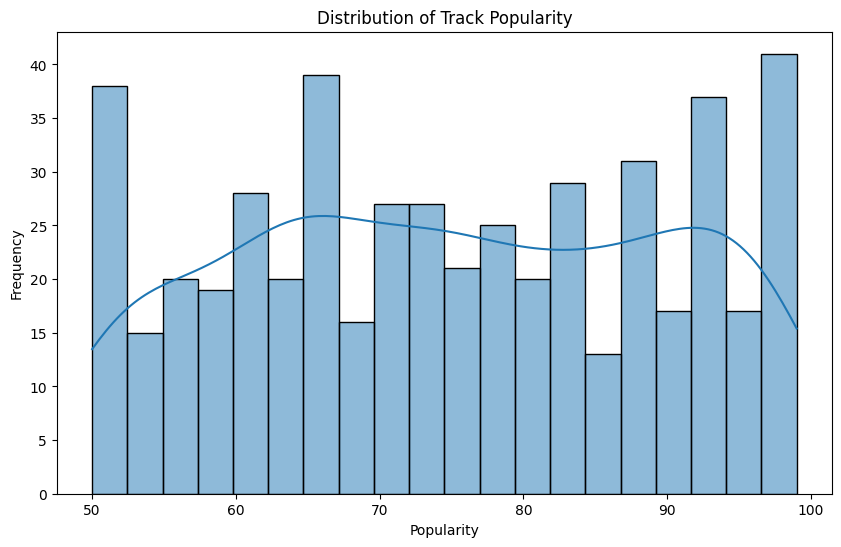

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# 3) Relationship Between Popularity and Duration of Tracks

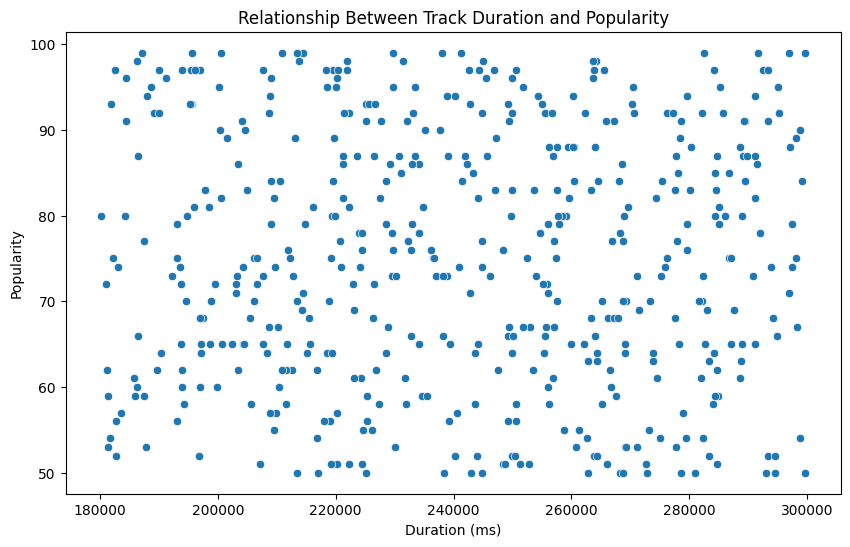

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Relationship Between Track Duration and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

# 4) Which Artist Has the Highest Number of Tracks?

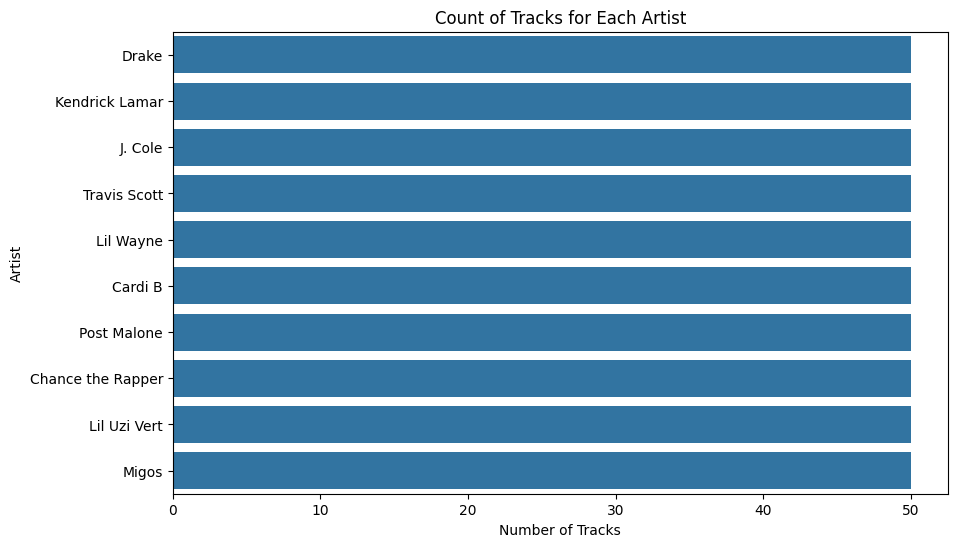

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index)
plt.title('Count of Tracks for Each Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

# 5) Top 5 Least Popular Tracks

In [37]:
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

Top 5 Least Popular Tracks:
               Artist Track Name  Popularity
47  Chance the Rapper   Track 48          50
49              Migos   Track 50          50
77  Chance the Rapper   Track 78          50
83       Travis Scott   Track 84          50
86        Post Malone   Track 87          50


# 6) Among the Top 5 Most Popular Artists, Which Artist Has the Highest Popularity on Average?

In [38]:
# Calculate average popularity for each artist
average_popularity_per_artist = df.groupby('Artist')['Popularity'].mean()

# Get the top 5 artists by average popularity
top_artists = average_popularity_per_artist.nlargest(5)

print("Top 5 Artists with Average Popularity:")
print(top_artists)

# Identify the artist with the highest average popularity among the top 5
highest_avg_artist = top_artists.idxmax()
highest_avg_value = top_artists.max()

print(f"The artist with the highest average popularity among the top 5 is {highest_avg_artist} with an average popularity of {highest_avg_value:.2f}.")

Top 5 Artists with Average Popularity:
Artist
Migos             77.68
Cardi B           77.18
Kendrick Lamar    76.00
J. Cole           75.34
Drake             75.18
Name: Popularity, dtype: float64
The artist with the highest average popularity among the top 5 is Migos with an average popularity of 77.68.


# 7 For the Top 5 Most Popular Artists, What Are Their Most Popular Tracks?

In [39]:
# Get the most popular tracks for the top 5 artists
most_popular_tracks = df[df['Artist'].isin(top_artists.index)]

print("Most Popular Tracks for the Top 5 Artists:")
for artist in top_artists.index:
    popular_track = most_popular_tracks[most_popular_tracks['Artist'] == artist].nlargest(1, 'Popularity')
    track_name = popular_track['Track Name'].values[0]
    track_popularity = popular_track['Popularity'].values[0]
    print(f"{artist}: {track_name} - Popularity: {track_popularity}")

Most Popular Tracks for the Top 5 Artists:
Migos: Track 220 - Popularity: 98
Cardi B: Track 266 - Popularity: 99
Kendrick Lamar: Track 202 - Popularity: 97
J. Cole: Track 133 - Popularity: 99
Drake: Track 51 - Popularity: 99


# 8) Pair Plot for Multiple Numerical Variables

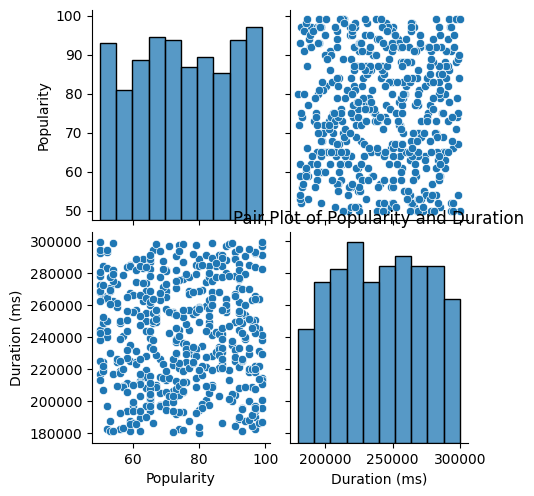

In [40]:
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.title('Pair Plot of Popularity and Duration')
plt.show()

# 9) Variation of Duration Among Artists

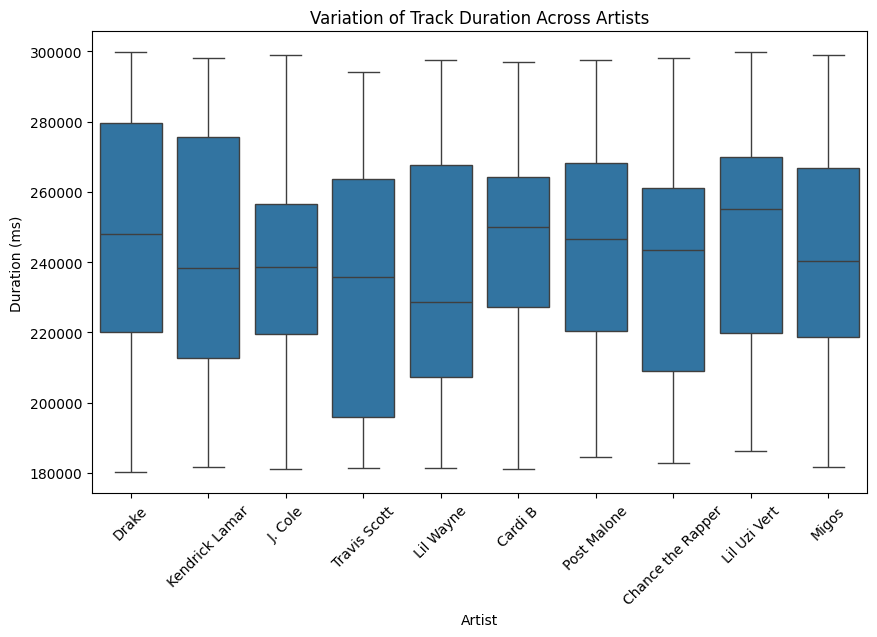

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.title('Variation of Track Duration Across Artists')
plt.xticks(rotation=45)
plt.show()

# 10) Distribution of Track Popularity for Different Artists

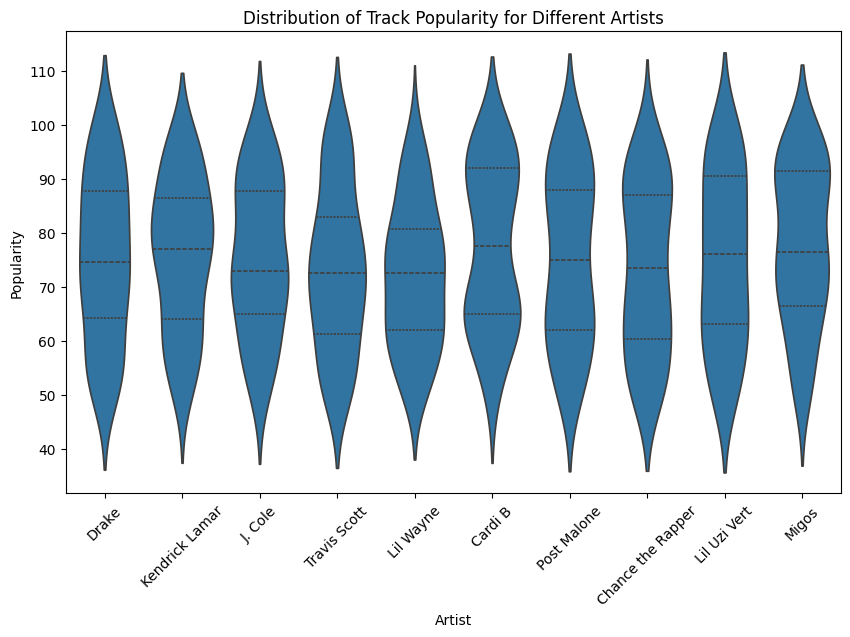

In [42]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Artist', y='Popularity', data=df, inner='quartile')
plt.title('Distribution of Track Popularity for Different Artists')
plt.xticks(rotation=45)
plt.show()